In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#genism
from gensim.parsing.preprocessing import remove_stopwords

from collections import OrderedDict

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import gensim

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('for_analysis.csv')


In [3]:
data

,text,split_text,counter,general_words_removed,drugsremoved
0,i don t have much experience with pg solutions...,"['I', ""don't"", 'have', 'much', 'experience', '...",137,experi solut chemic fulli dissolv chemic etiz ...,chemic fulli dissolv chemic multipl sublingu f...
1,i m thinking of doing of next month which...,"[""I'm"", 'thinking', 'of', 'doing', '10mg', 'of...",177,technic forgiv psychedel lsd shroom psychosi s...,technic forgiv psychedel psychosi manag couldn...
2,hi all what do you think of the below combina...,"['Hi', 'all,', 'what', 'do', 'you', 'think', '...",111,combin rcs potion colour colour achiev manufac...,combin potion colour colour achiev manufacture...
3,i want to start off by saying i had tried this...,"['I', 'want', 'to', 'start', 'off', 'by', 'say...",1098,combin didnt complic situat stori decid pcp in...,combin didnt complic situat stori decid initi ...
4,ok seriously though i don t want to be the re...,"['Ok', 'seriously', 'though,', 'I', ""don't"", '...",153,peopl addict peopl addict imagin masturb bliss...,addict addict imagin masturb bliss ultim prolo...
...,...,...,...,...,...
10241,i just started ritalin and i feel it very calm...,"['I', 'just', 'started', 'Ritalin', 'and', 'I'...",202,ritalin i'm snugg peac couch impuls realiz i'v...,ritalin snugg couch impuls realiz ritalin slac...
10242,it s not an ssri but if you re interested in ...,"[""It's"", 'not', 'an', 'SSRI,', 'but', 'if', ""y...",106,ssri antidepress depress arylcyclohexamin chem...,antidepress depress arylcyclohexamin chemic po...
10243,people saying that ssri s have no recreational...,"['People', 'saying', 'that', ""SSRI's"", 'have',...",589,peopl ssri recreat mistaken ssri antidepress s...,recreat mistaken antidepress serotonin releas ...
10244,ive always had a choice which method of delive...,"['Ive', 'always', 'had', 'a', 'choice', 'which...",104,ive choic deliveri reship deliveri failur poss...,choic deliveri reship deliveri failur possibl ...


In [4]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.7, #ignore terms that appear in more than X% of the document 
                                min_df = 4)  #ignore terms that appear in less than X documents
dtm_tf = tf_vectorizer.fit_transform(data.drugsremoved)
print(dtm_tf.shape)



(10246, 4799)


In [5]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data.drugsremoved)
print(dtm_tfidf.shape)

(10246, 4799)


In [6]:
dtm_tfidf

<10246x4799 sparse matrix of type '<class 'numpy.float64'>'
	with 177578 stored elements in Compressed Sparse Row format>

In [7]:
### for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [8]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')


2021-12-13 09:20:33,356 : INFO : NumExpr defaulting to 8 threads.


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      269.562408 -124.803398       1        1  31.383331
1        1.782994 -295.079681       2        1  29.319522
2      220.811432 -343.832123       3        1  20.290888
0       50.533993  -76.050934       4        1  19.006259, topic_info=          Term         Freq        Total Category  logprob  loglift
53      addict  1972.000000  1972.000000  Default  30.0000  30.0000
4746  withdraw  1006.000000  1006.000000  Default  29.0000  29.0000
4031    stimul  2252.000000  2252.000000  Default  28.0000  28.0000
213    anxieti  1756.000000  1756.000000  Default  27.0000  27.0000
1501  euphoria  1237.000000  1237.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2895     notic   206.108280  1247.238278   Topic4  -5.3189  -0.1399
1267       don   213.170883  1645.679069   Topic4  -5.2852  -0.3834
907      coupl   197.650198  1081.499171   Topic4  -5.3608  -0.0392
4320     toler   204.289546  1945.276576   Topic4  -5.3278  -0.5932
1345    easili   165.265333   518.217890   Topic4  -5.5398   0.5176

[335 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
15        1  0.081302     absorb
15        2  0.007391     absorb
15        3  0.155212     absorb
15        4  0.753887     absorb
16        1  0.066778    absorpt
...     ...       ...        ...
4630      1  0.987747   versatil
4648      3  0.987668     violet
4746      2  0.992362   withdraw
4746      4  0.006953   withdraw
4747      2  0.974624  withdrawl

[664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [9]:
p = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')


In [10]:
pyLDAvis.save_html(p, 'lda.html')

In [11]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)



Topic  0
chemic, substanc, snort, stimul, dissolv, addict, adderal, cocain, caffein, sourc, studi, freebas, measur, syring, nasal, don, extrem, compar, notic, toler

Topic  1
addict, anxieti, substanc, withdraw, depress, don, toler, medic, rememb, chemic, seizur, complet, stori, symptom, chang, bottl, advic, coupl, sober, respons

Topic  2
rememb, activ, chemic, intens, notic, toler, sedat, psychedel, complet, dosag, pellet, blotter, realiti, dissoci, natur, posit, experienc, mushroom, potent, dissolv

Topic  3
stimul, psychedel, disso, euphoria, substanc, dissoci, intens, combin, headspac, toler, euphor, decid, notic, comedown, serotonin, compar, snort, experienc, dosag, don


In [13]:
ex_label = [e[:30]+"..." for e in data.drugsremoved]
doc_word = tf_vectorizer.fit_transform(data.drugsremoved)
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=tf_vectorizer.get_feature_names()).head(10)

,aback,abandon,abbrevi,abdomen,abdomin,abduct,abhorr,abilifi,abnorm,abort,...,youtu,youtub,yummi,ziplock,zofran,zolpidem,zombi,zombifi,zopiclon,zyprexa
chemic fulli dissolv chemic mu...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
technic forgiv psychedel psych...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
combin potion colour colour ac...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
combin didnt complic situat st...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addict addict imagin masturb b...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adderal propylhexedrin phenid ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lamict lamict averag withdraw ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
receiv blotter decid experienc...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
awkward shrunken testicl physi...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clonaz singl gradual increas d...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
topic_word = pd.DataFrame(lda_tfidf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = tf_vectorizer.get_feature_names())
topic_word

,aback,abandon,abbrevi,abdomen,abdomin,abduct,abhorr,abilifi,abnorm,abort,...,youtu,youtub,yummi,ziplock,zofran,zolpidem,zombi,zombifi,zopiclon,zyprexa
component_1,0.274,0.577,1.602,1.029,0.732,0.613,0.268,1.174,2.694,0.254,...,0.380,1.227,1.172,0.255,0.250,0.257,6.809,0.254,0.904,1.860
component_2,0.257,0.894,0.252,0.279,0.254,0.258,0.853,0.251,0.251,0.257,...,7.688,3.566,0.284,1.694,0.254,0.251,1.988,0.251,0.279,0.254
component_3,0.841,0.252,1.189,0.329,0.251,1.456,0.250,0.251,0.257,0.259,...,0.310,7.248,0.660,0.251,0.250,7.698,0.252,0.254,3.873,0.253
component_4,0.590,3.551,0.256,0.678,1.465,0.281,0.255,1.522,4.217,4.732,...,0.702,9.530,0.371,0.630,1.976,0.526,1.237,1.511,0.300,0.250


In [15]:
doc_topic = lda_tf.fit_transform(doc_word)

In [16]:
doc_topic

array([[0.01976499, 0.01886481, 0.94303791, 0.01833228],
       [0.01723707, 0.77232986, 0.01754845, 0.19288463],
       [0.02097388, 0.52041872, 0.43573157, 0.02287583],
       ...,
       [0.07620836, 0.79404318, 0.00409089, 0.12565757],
       [0.95144275, 0.01641896, 0.01630701, 0.01583127],
       [0.47564835, 0.00930601, 0.00922437, 0.50582127]])

In [17]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)


Topic  0
chemic, substanc, snort, stimul, dissolv, addict, adderal, cocain, caffein, sourc, studi, freebas, measur, syring, nasal, don, extrem, compar, notic, toler

Topic  1
addict, anxieti, substanc, withdraw, depress, don, toler, medic, rememb, chemic, seizur, complet, stori, symptom, chang, bottl, advic, coupl, sober, respons

Topic  2
rememb, activ, chemic, intens, notic, toler, sedat, psychedel, complet, dosag, pellet, blotter, realiti, dissoci, natur, posit, experienc, mushroom, potent, dissolv

Topic  3
stimul, psychedel, disso, euphoria, substanc, dissoci, intens, combin, headspac, toler, euphor, decid, notic, comedown, serotonin, compar, snort, experienc, dosag, don


In [18]:
topics = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = ["Psycadelic","Euphoric",'Negative','Dangerous'])
topics.reset_index()

,index,Psycadelic,Euphoric,Negative,Dangerous
0,chemic fulli dissolv chemic mu...,0.01976,0.01886,0.94304,0.01833
1,technic forgiv psychedel psych...,0.01724,0.77233,0.01755,0.19288
2,combin potion colour colour ac...,0.02097,0.52042,0.43573,0.02288
3,combin didnt complic situat st...,0.00225,0.00230,0.35687,0.63858
4,addict addict imagin masturb b...,0.02680,0.57755,0.02671,0.36894
...,...,...,...,...,...
10241,ritalin snugg couch impuls rea...,0.33555,0.39597,0.01172,0.25675
10242,antidepress depress arylcycloh...,0.01043,0.96882,0.01033,0.01042
10243,recreat mistaken antidepress s...,0.07621,0.79404,0.00409,0.12566
10244,choic deliveri reship deliveri...,0.95144,0.01642,0.01631,0.01583


In [19]:
maxValueIndexObj = topics.idxmax(axis=1)
topics['effect'] = maxValueIndexObj
topics = topics.reset_index()
combined_df = pd.concat([data, topics], axis = 1)

In [20]:
combined_df = combined_df.drop(['counter','general_words_removed','drugsremoved','index','Psycadelic','Euphoric','Negative','Dangerous'], axis=1)

In [21]:
combined_df

,text,split_text,effect
0,i don t have much experience with pg solutions...,"['I', ""don't"", 'have', 'much', 'experience', '...",Negative
1,i m thinking of doing of next month which...,"[""I'm"", 'thinking', 'of', 'doing', '10mg', 'of...",Euphoric
2,hi all what do you think of the below combina...,"['Hi', 'all,', 'what', 'do', 'you', 'think', '...",Euphoric
3,i want to start off by saying i had tried this...,"['I', 'want', 'to', 'start', 'off', 'by', 'say...",Dangerous
4,ok seriously though i don t want to be the re...,"['Ok', 'seriously', 'though,', 'I', ""don't"", '...",Euphoric
...,...,...,...
10241,i just started ritalin and i feel it very calm...,"['I', 'just', 'started', 'Ritalin', 'and', 'I'...",Euphoric
10242,it s not an ssri but if you re interested in ...,"[""It's"", 'not', 'an', 'SSRI,', 'but', 'if', ""y...",Euphoric
10243,people saying that ssri s have no recreational...,"['People', 'saying', 'that', ""SSRI's"", 'have',...",Euphoric
10244,ive always had a choice which method of delive...,"['Ive', 'always', 'had', 'a', 'choice', 'which...",Psycadelic


In [22]:
a_file = open("drugs_corpus.csv", "r")
corpus1 = [s.strip() for s in a_file.readlines()]
drugs_corpus = set(corpus1)

In [23]:
def remove_duplicate(s): 
    new_list = []
    i = ",".join(OrderedDict.fromkeys(s))
    i = i.split(',')
    for i in i:
        new_list.append(i.replace('"', ""))
    return new_list 

In [24]:
drug_terms = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i in drugs_corpus:
            post_filter.append(i)
            post_filter = remove_duplicate(post_filter)
    post_filter = ' '.join(post_filter)
    drug_terms.append(post_filter)

In [25]:
combined_df['drug_terms'] = drug_terms

In [26]:
combined_df

,text,split_text,effect,drug_terms
0,i don t have much experience with pg solutions...,"['I', ""don't"", 'have', 'much', 'experience', '...",Negative,etiz ethanol diclazepam
1,i m thinking of doing of next month which...,"[""I'm"", 'thinking', 'of', 'doing', '10mg', 'of...",Euphoric,
2,hi all what do you think of the below combina...,"['Hi', 'all,', 'what', 'do', 'you', 'think', '...",Euphoric,mapb
3,i want to start off by saying i had tried this...,"['I', 'want', 'to', 'start', 'off', 'by', 'say...",Dangerous,opioid mxipr mdma
4,ok seriously though i don t want to be the re...,"['Ok', 'seriously', 'though,', 'I', ""don't"", '...",Euphoric,
...,...,...,...,...
10241,i just started ritalin and i feel it very calm...,"['I', 'just', 'started', 'Ritalin', 'and', 'I'...",Euphoric,adderall
10242,it s not an ssri but if you re interested in ...,"[""It's"", 'not', 'an', 'SSRI,', 'but', 'if', ""y...",Euphoric,dck ketamine
10243,people saying that ssri s have no recreational...,"['People', 'saying', 'that', ""SSRI's"", 'have',...",Euphoric,dopamine opioid ketamine
10244,ive always had a choice which method of delive...,"['Ive', 'always', 'had', 'a', 'choice', 'which...",Psycadelic,


In [27]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="effect", y="values", data=combined_df['effect'].value_counts() ,palette="Blues_d")
ax.set_title('Number of Posts per Topic')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Drug Term')


ValueError: Could not interpret input 'effect'

In [ ]:
mask1 = (combined_df['effect'] == 'Dangerous') & (combined_df['drug_terms'] != '')
mask2 = (combined_df['effect'] == 'Negative') & (combined_df['drug_terms'] != '')
mask3 = (combined_df['effect'] == 'Psycadelic') & (combined_df['drug_terms'] != '')
mask4 = (combined_df['effect'] == 'Euphoric') & (combined_df['drug_terms'] != '')

dangerous = combined_df[mask1]
negative = combined_df[mask2]
psycadelic = combined_df[mask3]
euphoric = combined_df[mask4]

dangerous_drugs = []
for i in dangerous.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            dangerous_drugs.append(i)
            
negative_drugs = []
for i in negative.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            negative_drugs.append(i)
            
psycadelic_drugs = []
for i in psycadelic.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            psycadelic_drugs.append(i)
            
euphoric_drugs = []
for i in euphoric.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            euphoric_drugs.append(i)
            
dangerous_df = pd.DataFrame(dangerous_drugs)
negative_df = pd.DataFrame(negative_drugs)
psycadelic_df = pd.DataFrame(psycadelic_drugs)
euphoric_df = pd.DataFrame(euphoric_drugs)

In [ ]:
dangerous_df_top['drugs'] = dangerous_df_top['drugs'].str.replace(',',' ')

In [ ]:
dangerous_df_top

In [ ]:
dangerous_df_fake_top = pd.DataFrame({'drugs': ['benzo', 'etizolam', 'ketamine', 'mdma','clonazolam'],
                   'values': [31, 30, 30, 30,21]})

In [ ]:
dangerous_df_top = pd.DataFrame(dangerous_df.value_counts().head(5))
dangerous_df_top['drugs'] = dangerous_df_top.index


sns.set_theme(style="whitegrid")
ax = sns.barplot(x="drugs", y= 'values', data= dangerous_df_fake_top,palette="Blues_d")
ax.set_title('Most Prevalent Drug Terms in Dangerous Topic')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Drug Term')


In [ ]:
negative_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Negative Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

In [ ]:
psycadelic_df.value_counts()

In [ ]:
psycadelic_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Psychadelic Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

In [ ]:
euphoric_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Euphoric Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

In [37]:
euphoric_df.value_counts().head(5)

dmt         35
mdma        34
ketamine    18
dopamine    18
benzo       14
dtype: int64

In [38]:
euphoric_df_fake_top = pd.DataFrame({'drugs': ['dmt', 'mdma', 'ketamine', 'dopamine','benzo'],
                   'values': [35, 34, 18, 18,12]})

Text(0.5, 0, 'Drug Term')

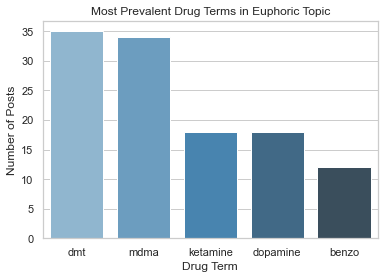

In [39]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="drugs", y= 'values', data= euphoric_df_fake_top,palette="Blues_d")
ax.set_title('Most Prevalent Drug Terms in Euphoric Topic')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Drug Term')


In [40]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
import matplotlib.colors as mcolors


# Get topic weights
topic_weights = doc_topic


# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1027 samples in 0.002s...
[t-SNE] Computed neighbors for 1027 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1027
[t-SNE] Computed conditional probabilities for sample 1027 / 1027
[t-SNE] Mean sigma: 0.017706
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.255116
[t-SNE] KL divergence after 1000 iterations: 0.270119


In [41]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1],color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [42]:
word_matrix = tf_vectorizer.fit_transform(data.drugsremoved)
vocab = tf_vectorizer.get_feature_names()

lda_tf.fit(word_matrix)

topic_matrix = lda_tf.transform(word_matrix)

topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df['text'] = data['text']
topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,text
0,0.006414,0.980555,0.006506,0.006524,took one tab of it at am and felt the firs...
1,0.006414,0.980555,0.006506,0.006524,took one tab at am and felt the first effe...
2,0.173452,0.301150,0.519896,0.005502,so my brain was virgin and i used both and ...
3,0.026557,0.376049,0.026407,0.570987,amp \n\noptical brightening agents obas ...
4,0.018923,0.018109,0.021275,0.941693,i’ve fucked around with pressed bars for quite...


In [43]:
df1 = topic_matrix_df[topic_matrix_df['text'].str.contains("i loved bromazolam ")]


In [70]:
print(df1.text)

299    i loved bromazolam  so i hate to say it   but ...
Name: text, dtype: object


In [44]:
def top_posts(topic_matrix_df, topic, n_posts):
    return (topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_posts)['text']
            .values
           )

In [46]:
for text in top_posts(topic_matrix_df, 'topic_3', 5):
    print(text, text.index)
    print()

warning  long thematic intro ahead  skip to trip report to get to nitty gritty  otherwise  enjoy  learn  and do not replicate  there were both good and bad lessons  

this is entirely true  not fabricated or embellished in any way  

intro 

friends  enemies  psychonauts  laymen  poor souls lost in r rc  and everything in between  i have seen what lies beyond and it is terrifyingly beautiful  haunting  and the sum of our fears  i say with    certainty that no scholar  messiah  street preacher  actor playing jesus being whipped  or raving lunatic has gotten it right  

until now 

forget your crusty books  your golden bibles  your totally not allowed secret nude statues of the well endowed muslim holy men of mecca  and hundreds of roman god s with chistled small penis having bodies  and the voluptuous cave statues of bbw women cavemen carried out  we are our own god  

the god of life  death  happiness  despair  joy  and the eternal pumping lurching lumbering heaving till your completel

In [67]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(dtm_tfidf)
corpus = dtm_tfidf
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

2021-11-12 10:34:33,118 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


TypeError: decoding to str: need a bytes-like object, csr_matrix found